# Práctico 1: Análisis y Visualización

In [1]:
# Importamos las librerías necesarias
import os
import sys
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Seteamos semilla random para reproducibilidad
np.random.seed(0)

### Inicialización y carga de datos

Puesto que el dataset se actualiza diariamente, para empezar a trabajar con el es conveniente cargarlo directamente desde Github, para contar siempre con la última versión.

En el mismo tenemos tres subconjuntos de datos.

In [3]:
#path = 'C:/Users/lucas/Documents/DIPLODATOS/MENTORÍA/Datos-Covid19-Argentina/'
url = 'https://raw.githubusercontent.com/lucia15/Datos-Covid19-Argentina/master'

In [4]:
file1 = os.path.join(url, 'Argentina-covid19.csv')

data1 = pd.read_csv(file1, error_bad_lines=False)

In [5]:
file2 = os.path.join(url, 'Argentina-covid19-por-provincia.csv')

data2 = pd.read_csv(file2, error_bad_lines=False)

In [6]:
file3 = os.path.join(url, 'Argentina-covid19-fallecidos.csv')

data3 = pd.read_csv(file3, error_bad_lines=False)

### Análisis exploratorio

### Dataset 1

In [7]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data1.shape[0])
print("Cantidad de columnas: ", data1.shape[1])

Cantidad de registros:  228
Cantidad de columnas:  33


In [8]:
# Listamos las columnas y sus tipos de datos
data1.dtypes

fecha                       object
dia_cuarentena             float64
casos_nuevos                 int64
casos_total                  int64
activos                    float64
alta_total                 float64
alta_nuevos                float64
muertes_total                int64
muertes_nuevos               int64
tests_realizados_total     float64
tests_realizados_nuevos    float64
test_por_millon_hab         object
UTI_internados             float64
UTI_%Nacion                 object
UTI_%AMBA                   object
%mujer                      object
%varon                      object
mujer_total                float64
varon_total                float64
franja_etaria               object
edad_prom                  float64
importados_total           float64
importados_nuevos          float64
local_total                float64
local_nuevos               float64
comunitario_total          float64
comunitario_nuevos         float64
en_investigacion_total     float64
en_investigacion_nue

In [9]:
# Cambiamos el tipo de la columna 'fecha' de object a datetime
data1['fecha'] = pd.to_datetime(data1['fecha'], format='%Y-%m-%d')

In [10]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data1.sample(2).transpose()

,139,200
fecha,2020-07-22 00:00:00,2020-09-21 00:00:00
dia_cuarentena,124,184
casos_nuevos,5782,8782
casos_total,141900,640147
activos,79085,118102
alta_total,62815,508563
alta_nuevos,2284,NaN
muertes_total,2588,13482
muertes_nuevos,98,429
tests_realizados_total,593044,1.76507e+06


In [11]:
# TO DO
# ¿En qué día se dio hasta ahora el record de contagios? ¿Y de muertes?

In [12]:
max_contagios_1 = data1.loc[data1['casos_nuevos'].idxmax()].fecha
print('Día con más contagios: ' + str(max_contagios_1.date()))
max_muertes_2 = data1.loc[data1['muertes_nuevos'].idxmax()].fecha
print('Día con más muertes: ' + str(max_muertes_2.date()))

Día con más contagios: 2020-10-15
Día con más muertes: 2020-10-01


In [13]:
# TO DO
# Hacer una exploración similar de los otros dos conjuntos de datos

### Dataset 2

In [14]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data2.shape[0])
print("Cantidad de columnas: ", data2.shape[1])

Cantidad de registros:  4965
Cantidad de columnas:  7


In [15]:
data2.dtypes

fecha              object
provincia          object
casos_total         int64
casos_nuevos        int64
muertes_total     float64
muertes_nuevos    float64
observaciones      object
dtype: object

In [16]:
# Cambiamos el tipo de la columna 'fecha' de object a datetime
data2['fecha'] = pd.to_datetime(data2['fecha'], format='%Y-%m-%d')

In [17]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data2.sample(2).transpose()

,3918,3559
fecha,2020-09-05 00:00:00,2020-08-21 00:00:00
provincia,Jujuy,La Pampa
casos_total,9875,187
casos_nuevos,326,0
muertes_total,220,2
muertes_nuevos,0,0
observaciones,NaN,NaN


In [18]:
max_contagios_2 = data2.loc[data2['casos_nuevos'].idxmax()].fecha
print('Día con más contagios: ' + str(max_contagios_2.date()))
max_muertes_2 = data2.loc[data2['muertes_nuevos'].idxmax()].fecha
print('Día con más muertes: ' + str(max_muertes_2.date()))

Día con más contagios: 2020-08-28
Día con más muertes: 2020-10-01


### Dataset 3

In [19]:
# Obtenemos la cantidad de filas y columnas
print("Cantidad de registros: ", data3.shape[0])
print("Cantidad de columnas: ", data3.shape[1])

Cantidad de registros:  26301
Cantidad de columnas:  9


In [20]:
data3.dtypes

fecha              object
provincia          object
num_caso            int64
genero             object
edad              float64
tipo_caso          object
comorbilidades     object
viajes             object
observaciones      object
dtype: object

In [21]:
# Cambiamos el tipo de la columna 'fecha' de object a datetime
data3['fecha'] = pd.to_datetime(data3['fecha'], format='%Y-%m-%d')

In [22]:
# Analizamos 2 muestras de filas, usamos transpose() para visualizar los datos con mayor comodidad
data3.sample(2).transpose()

,2526,9025
fecha,2020-07-22 00:00:00,2020-09-02 00:00:00
provincia,Buenos Aires,Buenos Aires
num_caso,2527,9026
genero,hombre,hombre
edad,NaN,NaN
tipo_caso,NaN,NaN
comorbilidades,NaN,NaN
viajes,NaN,NaN
observaciones,NaN,NaN


#### Tareas a realizar:

*   Análisis estadístico de variables

> Seleccionar un conjunto de al menos **cuatro** variables que les resulten de interés y:
1.   Usar distintos tipos de gráficos para describir sus distribuciones
2.   Analizar Outliers (si los hubiera)
3.   Calcular estadísticos clásicos (media, mediana, moda, desviación estandar)

* Evolución de variables en el tiempo

> Seleccionar al menos **tres** variables y graficar como fueron cambiando desde el primer día hasta hoy.

*   Análisis de probabilidades condicionales e independencia entre dos variables.

> Con al menos **un** par de variables realizar un análisis de este tipo.

>  Algunas ideas guía:
1.   ¿Cuál es la probabilidad de que un infectado sea mujer (varón)?
2.   ¿Cuál es la probabilidad de que un infectado sea de Córdoba (u otra provincia)?
3.   Probabilidad de que un fallecido sea mujer (varón)
4.   Probabilidad de que un fallecido sea mujer (varón) dado que está en la franja etaria 60-80 (u alguna otra).
5.   Probabilidad de que un fallecido en la franja etaria 60-80 sea mujer (varón).
6.   Probabilidad de que un fallecido sea de CABA dado que es mujer. Y viceversa, que sea mujer dado que es de CABA.
7.   Probabilidad de que un fallecido en la franja etaria 30-60 sea de Chaco. (Quizás encontremos alguna correlación interesante entre edad y provincia).
8.   ¿El género de un fallecido es independiente de la franja etaria?
9.   ¿El género de un fallecido es independiente de la provincia?
10.  ¿La franja etaria de un fallecido es independiente de la provincia?

### Análisis estadístico de variables

#### 1.   Usar distintos tipos de gráficos para describir sus distribuciones

/home/matias/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


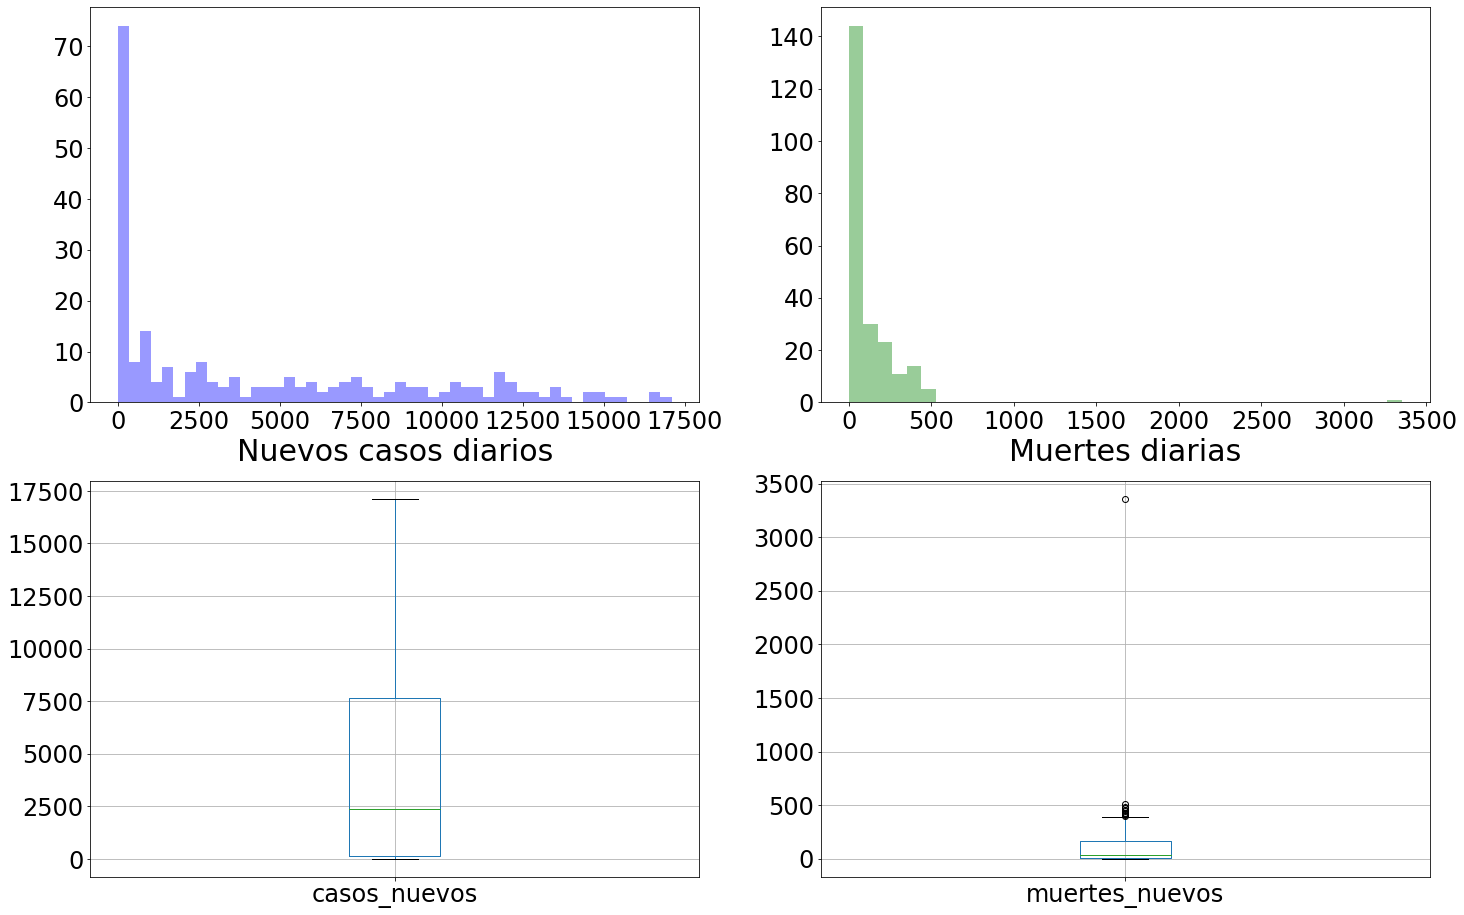

In [23]:
fig, axs = plt.subplots(2,2, figsize=(24, 16))  # para plotear un gráfico al lado del otro

sns.distplot(data1['casos_nuevos'],kde=False, bins=50, label='Nuevos casos diarios', color='blue', ax=axs[0,0])
sns.distplot(data1['muertes_nuevos'],kde=False, bins=38, label='Muertes diarias', color='green', ax=axs[0,1])

for ax in axs[0]:
    ax.title.set_fontsize(30)
    ax.tick_params(axis="x", labelsize=24)
    ax.tick_params(axis="y", labelsize=24)
axs[0,0].set_xlabel('Nuevos casos diarios', fontsize = 30)
axs[0,1].set_xlabel('Muertes diarias', fontsize = 30)

data1.boxplot(column='casos_nuevos', ax=axs[1,0])
data1.boxplot(column='muertes_nuevos', ax=axs[1,1])

for ax in axs[1]:
    ax.title.set_fontsize(20)
    ax.tick_params(axis="x", labelsize=24)
    ax.tick_params(axis="y", labelsize=24)

In [24]:
muertes_mujeres = data3[data3['genero']=='mujer']
muertes_varones = data3[data3['genero']=='hombre']

/home/matias/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Edad')

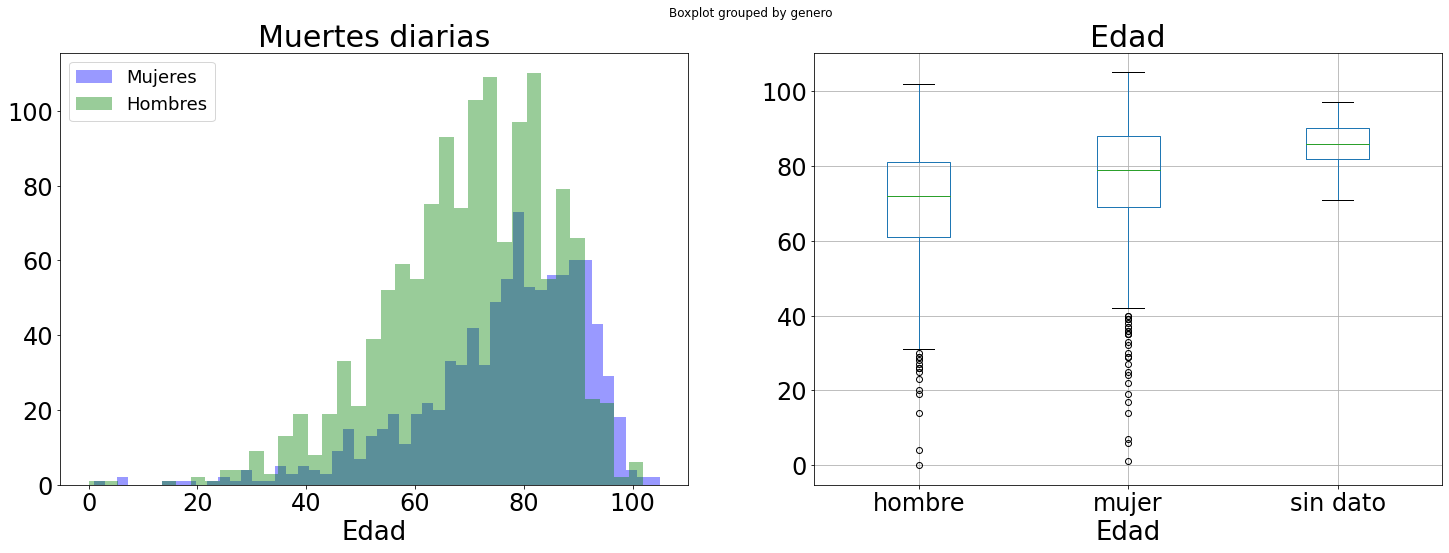

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(24, 8))  # para plotear un gráfico al lado del otro


sns.distplot(muertes_mujeres['edad'],kde=False, bins=50, label='Mujeres', color='blue', ax=axs[0])
sns.distplot(muertes_varones['edad'],kde=False, bins=38, label='Hombres', color='green', ax=axs[0])

axs[0].tick_params(axis="x", labelsize=24)
axs[0].tick_params(axis="y", labelsize=24)
axs[0].set_xlabel('Edad', fontsize = 26)
axs[0].legend(fontsize=18)
axs[0].set_title('Muertes diarias',fontsize=30)

data3.boxplot(column='edad',by='genero', rot=0, ax=axs[1], fontsize=24);

axs[1].set_title('Edad',fontsize=30)
axs[1].set_xlabel('Edad', fontsize = 26)

#### 2.   Analizar Outliers (si los hubiera)

In [26]:
outliers_casos_nuevos = data1[ data1.casos_nuevos > data1.casos_nuevos.mean() + 3*data1.casos_nuevos.std() ]
outliers_muertes_nuevos = data1[ data1.muertes_nuevos > data1.muertes_nuevos.mean() + 3*data1.muertes_nuevos.std() ]
outliers_muertes_mujeres =  muertes_mujeres[ muertes_mujeres.edad < muertes_mujeres.edad.mean() - 3*muertes_mujeres.edad.std() ]
outliers_muertes_varones = muertes_varones[ muertes_varones.edad < muertes_varones.edad.mean() - 3*muertes_varones.edad.std() ]

In [27]:
outliers_casos_nuevos

,fecha,dia_cuarentena,casos_nuevos,casos_total,activos,alta_total,alta_nuevos,muertes_total,muertes_nuevos,tests_realizados_total,...,local_total,local_nuevos,comunitario_total,comunitario_nuevos,en_investigacion_total,en_investigacion_nuevos,alta_definitiva,descartados_total,descartados_nuevos,observaciones


In [28]:
outliers_muertes_nuevos

,fecha,dia_cuarentena,casos_nuevos,casos_total,activos,alta_total,alta_nuevos,muertes_total,muertes_nuevos,tests_realizados_total,...,local_total,local_nuevos,comunitario_total,comunitario_nuevos,en_investigacion_total,en_investigacion_nuevos,alta_definitiva,descartados_total,descartados_nuevos,observaciones
210,2020-10-01,194.0,14001,765002,141574.0,603140.0,8495.0,20288,3352,2002975.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,En el día de hoy fueron notificados en el Sist...


In [29]:
outliers_muertes_mujeres

,fecha,provincia,num_caso,genero,edad,tipo_caso,comorbilidades,viajes,observaciones
554,2020-06-01,Chaco,555,mujer,14.0,NaN,Enfermedad autoinmune,NaN,NaN
732,2020-06-10,Buenos Aires,733,mujer,7.0,NaN,Fibrosis quística,NaN,NaN
761,2020-06-11,Buenos Aires,762,mujer,29.0,NaN,NaN,NaN,NaN
810,2020-06-13,Buenos Aires,811,mujer,29.0,NaN,NaN,NaN,NaN
906,2020-06-17,Buenos Aires,907,mujer,25.0,NaN,NaN,NaN,NaN
1101,2020-06-24,Buenos Aires,1102,mujer,1.0,NaN,Enfermedad neurológica y EPOC con Oxígeno depe...,NaN,NaN
1105,2020-06-24,Buenos Aires,1106,mujer,6.0,NaN,Enfermedad oncológica,NaN,NaN
1342,2020-07-01,Buenos Aires,1343,mujer,27.0,NaN,NaN,NaN,NaN
1569,2020-07-06,Buenos Aires,1570,mujer,17.0,NaN,NaN,NaN,NaN
1595,2020-07-07,Buenos Aires,1596,mujer,29.0,NaN,NaN,NaN,NaN


In [30]:
outliers_muertes_varones

,fecha,provincia,num_caso,genero,edad,tipo_caso,comorbilidades,viajes,observaciones
406,2020-05-21,Buenos Aires,407,hombre,19.0,NaN,NaN,NaN,NaN
793,2020-06-13,Buenos Aires,794,hombre,14.0,NaN,NaN,NaN,NaN
1662,2020-07-08,Buenos Aires,1663,hombre,25.0,NaN,NaN,NaN,NaN
1826,2020-07-12,Buenos Aires,1827,hombre,4.0,NaN,NaN,NaN,NaN
1996,2020-07-15,Buenos Aires,1997,hombre,20.0,NaN,NaN,NaN,NaN
2024,2020-07-15,Río Negro,2025,hombre,23.0,NaN,NaN,NaN,NaN
2186,2020-07-18,Buenos Aires,2187,hombre,0.0,NaN,NaN,NaN,NaN


#### 3. Calcular estadísticos clásicos (media, mediana, moda, desviación estandar)

In [31]:
from scipy import stats

In [32]:
datos = []

datos.append({
    'Variable' : 'casos nuevos diarios',
    'media' : np.nanmean(data1['casos_nuevos']),
    'SD' : np.nanstd(data1['casos_nuevos']),
    'mediana' : np.nanmedian(data1['casos_nuevos']),
    'moda' : stats.mode(data1['casos_nuevos'])[0][0], 
    'outliers' : len(outliers_casos_nuevos),
})

datos.append({
    'Variable' : 'muertes diarias',
    'media' : np.nanmean(data1['muertes_nuevos']),
    'SD' : np.nanstd(data1['muertes_nuevos']),
    'mediana' : np.nanmedian(data1['muertes_nuevos']),
    'moda' : stats.mode(data1['muertes_nuevos'])[0][0], 
    'outliers' : len(outliers_muertes_nuevos),
})

datos.append({
    'Variable' : 'edad de muerte de mujeres',
    'media' : np.nanmean(muertes_mujeres['edad']),
    'SD' : np.nanstd(muertes_mujeres['edad']),
    'mediana' : np.nanmedian(muertes_mujeres['edad']),
    'moda' : stats.mode(muertes_mujeres['edad'])[0][0],
    'outliers' :len(outliers_muertes_mujeres)
})

datos.append({
    'Variable' : 'edad de muerte de hombes',
    'media' : np.nanmean(muertes_varones['edad']),
    'SD' : np.nanstd(muertes_varones['edad']),
    'mediana' : np.nanmedian(muertes_varones['edad']),
    'moda' : stats.mode(muertes_varones['edad'])[0][0],
    'outliers' :len(outliers_muertes_varones)
})

datos = pd.DataFrame(datos)
datos

,Variable,media,SD,mediana,moda,outliers
0,casos nuevos diarios,4340.377193,4768.256277,2368.0,88.0,0
1,muertes diarias,115.385965,250.651852,34.0,0.0,1
2,edad de muerte de mujeres,76.312700,15.538893,79.0,88.0,13
3,edad de muerte de hombes,70.061980,14.927158,72.0,81.0,7


### Evolución de variables en el tiempo

In [33]:
def time_plot(x, y, title, ylabel, y2=None, label1='', label2='', filename=None):

    fig, ax = plt.subplots(figsize=(10, 5))

    if y2 is not None:
        ax.plot(x, y, '-o', label=label1)
        ax.plot(x, y2, '-s', label=label2)
    else:
        ax.plot(x, y, '-o')
        
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Día', fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)

    ax.set_xticks(x[::7])
    ax.set_xticklabels(x[::7])

    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.legend(loc='best')
    plt.grid()

    plt.tight_layout()
    
    if filename is not None: 
        plt.savefig(filename)
    
    plt.show()

In [34]:
fechas = (data1['fecha'].dt.day).astype(str) +'/'+ (data1['fecha'].dt.month).astype(str)

- ##### Variable: casos_nuevos

In [35]:
casos_nuevos = data1['casos_nuevos']

No handles with labels found to put in legend.


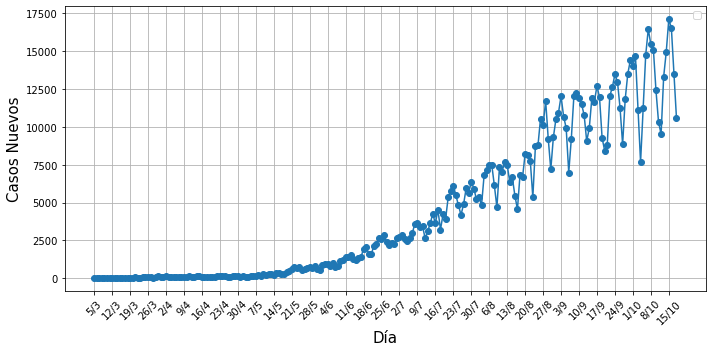

In [36]:
time_plot(fechas, casos_nuevos, title='', ylabel='Casos Nuevos', filename='dataset_viejo/imagen3.png')

Este gráfico describe la evolución de la variable **casos_nuevos** en función del tiempo. En el eje x vemos la fecha y en el y la cantidad de casos nuevos.

- #### Variable: casos_total

In [37]:
casos_total = data1['casos_total']

No handles with labels found to put in legend.


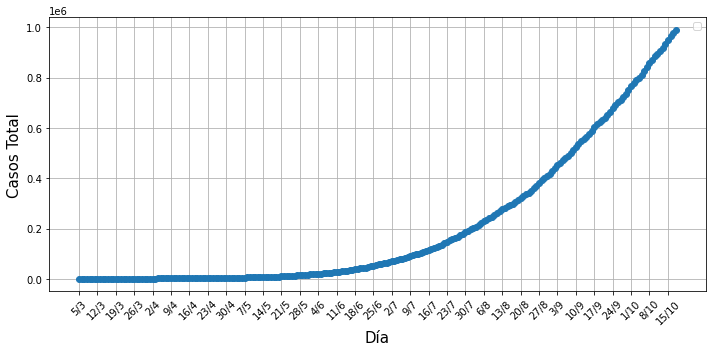

In [38]:
time_plot(fechas, casos_total, title='', ylabel='Casos Total', filename='dataset_viejo/imagen4.png')

Este gráfico describe la evolución de la variable **casos_total** en función del tiempo. En el eje x vemos la fecha y en el y la cantidad de casos totales (acumulados).

- ##### Variable: muertes_nuevos

In [39]:
muertes_nuevos = data1['muertes_nuevos']

No handles with labels found to put in legend.


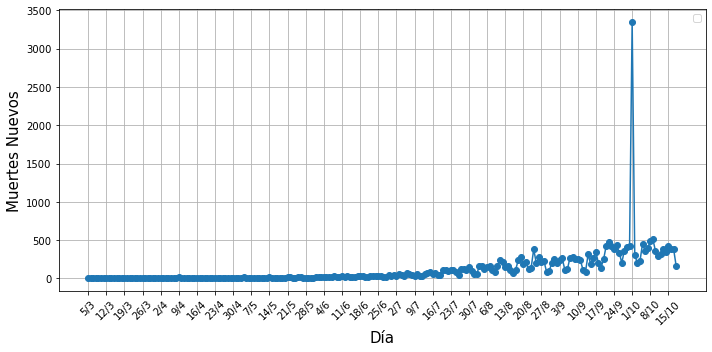

In [40]:
time_plot(fechas, muertes_nuevos, title='', ylabel='Muertes Nuevos', filename='dataset_viejo/imagen5.png')

Este gráfico describe la evolución de la variable **muertes_nuevo** en función del tiempo. En el eje x vemos la fecha y en el y la cantidad de muertes nuevas.

- ##### Variable: muertes_total

In [41]:
muertes_total = data1['muertes_total']

No handles with labels found to put in legend.


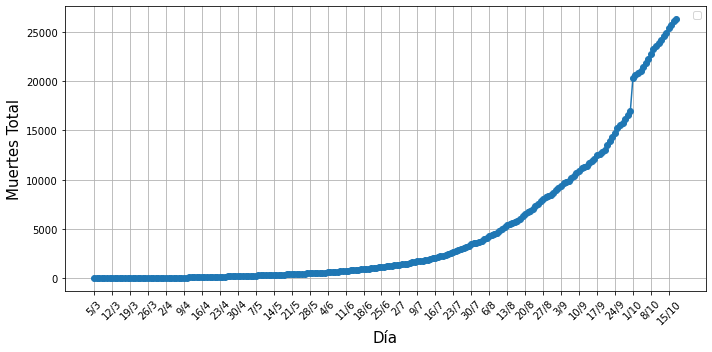

In [42]:
time_plot(fechas, muertes_total, title='', ylabel='Muertes Total', filename='dataset_viejo/imagen6.png')

Este gráfico describe la evolución de la variable **muertes_total** en función del tiempo. En el eje x vemos la fecha y en el y la cantidad de muertes totales (acumuladas).

 ### Análisis de probabilidades condicionales e independencia entre dos variables.

#### 1.   ¿Cuál es la probabilidad de que un infectado sea mujer (varón)?

In [43]:
data1.columns

Index(['fecha', 'dia_cuarentena', 'casos_nuevos', 'casos_total', 'activos',
       'alta_total', 'alta_nuevos', 'muertes_total', 'muertes_nuevos',
       'tests_realizados_total', 'tests_realizados_nuevos',
       'test_por_millon_hab', 'UTI_internados', 'UTI_%Nacion', 'UTI_%AMBA',
       '%mujer', '%varon', 'mujer_total', 'varon_total', 'franja_etaria',
       'edad_prom', 'importados_total', 'importados_nuevos', 'local_total',
       'local_nuevos', 'comunitario_total', 'comunitario_nuevos',
       'en_investigacion_total', 'en_investigacion_nuevos', 'alta_definitiva',
       'descartados_total', 'descartados_nuevos', 'observaciones'],
      dtype='object')

In [44]:
data1[~data1['mujer_total'].isnull()].iloc[-1]['mujer_total'], data1[~data1['mujer_total'].isnull()].iloc[-1]['casos_total']

(252560.0, 512293)

In [69]:
prob_mujer = int(data1.iloc[-1]['mujer_total']) / int(data1.iloc[-1]['casos_total'])
porc_mujer = data1.iloc[-1]['%mujer']
print('Probabilidad de que un infectado sea mujer: ' + str(round(prob_mujer, 3)) + ' .Porcentaje de mujeres infectadas: ' + str(porc_mujer) + '%')

prob_varon = int(data1.iloc[-1]['varon_total']) / int(data1.iloc[-1]['casos_total'])
porc_varon = data1.iloc[-1]['%varon']
print('Probabilidad de que un infectado sea varón: ' + str(round(prob_varon, 3)) + ' .Porcentaje de varones infectados: ' + str(porc_varon) + '%')

ValueError: cannot convert float NaN to integer

#### 2.   ¿Cuál es la probabilidad de que un infectado sea de Córdoba (u otra provincia)?

In [70]:
def prob_provincia(nombre_provincia):
    casos_provincia = data2[data2.provincia == nombre_provincia].iloc[-1].casos_total
    casos_totales = data1.iloc[-1].casos_total
    return casos_provincia / casos_totales

In [71]:
provincias = sorted(data2.provincia.unique())
for provincia in provincias:
    prob = prob_provincia(provincia)
    print('Probabilidad de que un infectado sea de ' + provincia + ': '+ str(round(prob, 3)))

Probabilidad de que un infectado sea de Buenos Aires: 0.503
Probabilidad de que un infectado sea de CABA: 0.141
Probabilidad de que un infectado sea de Catamarca: 0.0
Probabilidad de que un infectado sea de Chaco: 0.012
Probabilidad de que un infectado sea de Chubut: 0.009
Probabilidad de que un infectado sea de Corrientes: 0.002
Probabilidad de que un infectado sea de Córdoba: 0.064
Probabilidad de que un infectado sea de Entre Ríos: 0.012
Probabilidad de que un infectado sea de Formosa: 0.0
Probabilidad de que un infectado sea de Jujuy: 0.017
Probabilidad de que un infectado sea de La Pampa: 0.002
Probabilidad de que un infectado sea de La Rioja: 0.007
Probabilidad de que un infectado sea de Mendoza: 0.037
Probabilidad de que un infectado sea de Misiones: 0.0
Probabilidad de que un infectado sea de Neuquén: 0.015
Probabilidad de que un infectado sea de Río Negro: 0.019
Probabilidad de que un infectado sea de Salta: 0.017
Probabilidad de que un infectado sea de San Juan: 0.001
Probabi

#### 3.   Probabilidad de que un fallecido sea mujer (varón)

In [72]:
mujeres  = len(data3[data3['genero']=='mujer'])
varones  = len(data3[data3['genero']=='hombre'])
total    = len(data3)

if ( total != mujeres + varones ):
    #print('Error en la suma', data3['genero'].isna().sum())
    #print('\n\n')
    if ( total == data3['genero'].isna().sum() + mujeres + varones ):
        total = mujeres + varones

print( 'Probabilidades de que un fallecido sea mujer u hombre: \n' )
print( 'P(mujer)  = ', float(mujeres)/float(total) )
print( 'P(hombre) = ', float(varones)/float(total) )

Probabilidades de que un fallecido sea mujer u hombre: 

P(mujer)  =  0.4343180867647618
P(hombre) =  0.5617276909623208


#### 4.   Probabilidad de que un fallecido sea mujer (varón) dado que está en la franja etaria 60-80 (u alguna otra).

In [73]:
df = data3[ data3['edad'] >= 60 ]
df = df[ df['edad'] <= 80 ]
mujeres_60_80  = len(df[df['genero']=='mujer'])
varones_60_80  = len(df[df['genero']=='hombre'])
total_60_80    = mujeres_60_80 + varones_60_80

print( '*Probabilidades de que un fallecido sea mujer u hombre, dado que se encontraban en \n la franja etaria entre 60 y 80 años: \n' )
print( 'P(mujer | 60<edad<80)  = ', round(float(mujeres_60_80)/float(total_60_80), 3))
print( 'P(hombre | 60<edad<80) = ', round(float(varones_60_80)/float(total_60_80), 3 ))

print( '\n' )
print( '*Probabilidades de que un fallecido sea mujer u hombre, y que se encontraban en \n la franja etaria entre 60 y 80 años: \n' )
print( 'P(60<edad<80) = ', round(float(total_60_80)/float(total), 3), '\n' )
print( 'P(mujer,60<edad<80)  = ', round(float(mujeres_60_80)/float(total), 3))
print( 'P(hombre,60<edad<80) = ', round(float(varones_60_80)/float(total), 3 ))

*Probabilidades de que un fallecido sea mujer u hombre, dado que se encontraban en 
 la franja etaria entre 60 y 80 años: 

P(mujer | 60<edad<80)  =  0.36
P(hombre | 60<edad<80) =  0.64


*Probabilidades de que un fallecido sea mujer u hombre, y que se encontraban en 
 la franja etaria entre 60 y 80 años: 

P(60<edad<80) =  0.04 

P(mujer,60<edad<80)  =  0.014
P(hombre,60<edad<80) =  0.026


#### 5. Probabilidad de que un fallecido en la franja etaria 60-80 sea mujer (varón).

In [74]:
# Probabilidad de que sea mujer de entre 60 y 80 años
prob_fallec_mujer_60_80 = len(data3[(data3.genero == 'mujer') & ((data3.edad >= 60) & (data3.edad <= 80))]) / len(data3[(data3.edad >= 60) & (data3.edad <= 80)])
print("Probabilidad de que sea mujer de entre 60 y 80 años: " + str(round(prob_fallec_mujer_60_80, 3)))

Probabilidad de que sea mujer de entre 60 y 80 años: 0.359


In [75]:
# Probabilidad de que sea hombre de entre 60 y 80 años
prob_fallec_hombre_60_80 = len(data3[(data3.genero == 'hombre') & ((data3.edad >= 60) & (data3.edad <= 80))]) / len(data3[(data3.edad >= 60) & (data3.edad <= 80)])
print("Probabilidad de que sea hombre de entre 60 y 80 años: " + str(round(prob_fallec_hombre_60_80, 3)))

Probabilidad de que sea hombre de entre 60 y 80 años: 0.639


#### 6.   Probabilidad de que un fallecido sea de CABA dado que es mujer. Y viceversa, que sea mujer dado que es de CABA.

In [76]:
# Probabilidad de que sea de CABA dado que es mujer
prob_fallec_CABA_mujer = len(data3[(data3.provincia == 'CABA') & (data3.genero == 'mujer')]) / len(data3[data3.genero == 'mujer'])
print("Probabilidad de que sea de CABA dado que es mujer: " + str(round(prob_fallec_CABA_mujer, 3)))

Probabilidad de que sea de CABA dado que es mujer: 0.175


In [77]:
# Probabilidad de que sea mujer dado que es de CABA
prob_fallec_mujer_CABA = len(data3[(data3.genero == 'mujer') & (data3.provincia == 'CABA')]) / len(data3[data3.provincia == 'CABA'])
print("Probabilidad de que sea mujer dado que es de CABA: " + str(round(prob_fallec_mujer_CABA, 3)))

Probabilidad de que sea mujer dado que es de CABA: 0.471


#### 7.   Probabilidad de que un fallecido en la franja etaria 30-60 sea de Chaco. (Quizás encontremos alguna correlación interesante entre edad y provincia).

In [78]:
# Probabilidad de que sea de Chaco y tenga entre 30 y 60 años
prob_CHACO_30_60 = len(data3[(data3.provincia == 'Chaco') & ((data3.edad >= 30) & (data3.edad <= 60))]) / len(data3[(data3.edad >= 30) & (data3.edad <= 60)])
print("Probabilidad de que sea de Chaco y tenga entre 30 y 60 años: " + str(round(prob_CHACO_30_60, 3)))

Probabilidad de que sea de Chaco y tenga entre 30 y 60 años: 0.097


In [79]:
# Probabilidad de que tenga entre 30 y 60 años dado que es de Chaco
prob_30_60_CHACO = len(data3[((data3.edad >= 30) & (data3.edad <= 60)) & (data3.provincia == 'Chaco')]) / len(data3[(data3.provincia == 'Chaco')])
print("Probabilidad de que tenga entre 30 y 60 años dado que es de Chaco: " + str(round(prob_30_60_CHACO, 3)))

Probabilidad de que tenga entre 30 y 60 años dado que es de Chaco: 0.114


#### Fallecidos - Análisis de correlación entre edad y provincia
A continuación se presenta un mapa de calor que permite visualizar los casos fallecidos agrupados por rangos de edad y ciudad. Se puede observar que para las provincias de Buenos Aires, Chaco y Córdoba, la mayor cantidad de fallecidos tienen entre 60 y 80 años; mientras que en CABA la mayor concentración de fallecidos se presenta en rangos etarios superiores 80 años.

In [80]:
def to_categorical(column, bin_size=20, min_cut=20, max_cut=100):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

[(20, 40), (40, 60), (60, 80), (80, 100), (100, 105)]


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Edades', ylabel='provincia'>

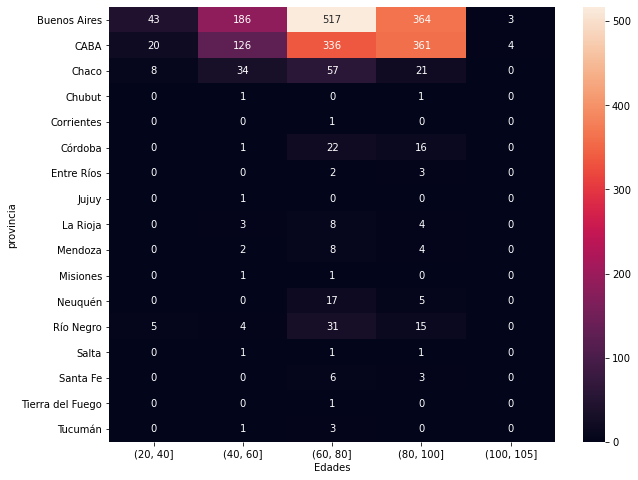

In [81]:
df_edades = data3[~data3.edad.isnull()]
df_edades['Edades'] = to_categorical(df_edades.edad)

plt.figure(figsize=(10, 8))
exp = pd.crosstab(df_edades.provincia, df_edades.Edades)
sns.heatmap(exp, annot=True, fmt='g')

#### 8.   ¿El género de un fallecido es independiente de la franja etaria?

En este caso para verificar la independencia, comprobamos si cumple el siguiente criterio: $P(A|B) = P(A)$.

En nuestro caso P(A|B) es igual a prob_fallec_mujer_60_80 (Probabilidad de que la fallecida sea mujer de entre 60 y 80 años) y P(A) es la probabilidad de que sea mujer 

In [82]:
prob_fallec_mujer_60_80 == prob_mujer

NameError: name 'prob_mujer' is not defined

In [83]:
prob_fallec_hombre_60_80 == prob_varon

NameError: name 'prob_varon' is not defined

Comprobamos que no son independientes ya que no se cumple el criterio definido. Realizamos el mismo análisis para los varones y determinamos que tampoco se cumple el criterio. Podemos afirmar que el género de un fallecido no es independiente de la franja etaria.

#### 9.   ¿El género de un fallecido es independiente de la provincia?

En este caso para verificar la independencia, comprobamos si cumple el siguiente criterio: $P(A\cap B) = P(A)*P(B)$.

Dónde  𝑃(𝐴∩𝐵) es PROB_CHACO_MUJER (Probabilidad de que sea del Chaco dado que es del Mujer), y P(A) es probabilidad que sea del Chaco y P(B) probabilidad que sea mujer.

In [84]:
PROB_CHACO = len(data3[(data3.provincia == 'Chaco')]) / len(data3)

In [85]:
PROB_CHACO_MUJER = len(data3[((data3.provincia == 'Chaco') & (data3.genero == 'mujer'))]) / len(data3[(data3.genero == 'mujer')])

In [86]:
PROB_CHACO_MUJER == PROB_CHACO * prob_mujer

NameError: name 'prob_mujer' is not defined

Comprobamos que no son independientes ya que no se cumple el criterio definido.

#### 10.  ¿La franja etaria de un fallecido es independiente de la provincia?

En este caso para verificar la independencia, comprobamos si cumple el siguiente criterio: $P(A\cap B) = P(A)*P(B)$.

Dónde  𝑃(𝐴∩𝐵) es prob_CHACO_30_60 (Probabilidad de que sea de Chaco y tenga entre 30 y 60 años), y P(A) es probabilidad que sea del Chaco y P(B) probabilidad que tenga entre 30 y 60 años.

In [87]:
prob_30_60 = len(data3[((data3.edad >= 30) & (data3.edad <= 60))]) / len(data3)

In [88]:
prob_CHACO_30_60 ==  PROB_CHACO * prob_30_60

False

Comprobamos que no son independientes ya que no se cumple el criterio definido.

# Dataset del Ministerio de Salud

In [89]:
url = 'https://sisa.msal.gov.ar/datos/descargas/covid-19/files/Covid19Casos.csv'

dataset = pd.read_csv(url, error_bad_lines=False)

path = 'Covid19Casos.csv'

dataset.to_csv(path, index = False)
#dataset = pd.read_csv(path, error_bad_lines=False)

In [90]:
dataset.convert_dtypes().dtypes

id_evento_caso                       Int64
sexo                                string
edad                                 Int64
edad_años_meses                     string
residencia_pais_nombre              string
residencia_provincia_nombre         string
residencia_departamento_nombre      string
carga_provincia_nombre              string
fecha_inicio_sintomas               string
fecha_apertura                      string
sepi_apertura                        Int64
fecha_internacion                   string
cuidado_intensivo                   string
fecha_cui_intensivo                 string
fallecido                           string
fecha_fallecimiento                 string
asistencia_respiratoria_mecanica    string
carga_provincia_id                   Int64
origen_financiamiento               string
clasificacion                       string
clasificacion_resumen               string
residencia_provincia_id              Int64
fecha_diagnostico                   string
residencia_

In [91]:
dataset['fecha_inicio_sintomas'] = pd.to_datetime(dataset['fecha_inicio_sintomas'], format='%Y-%m-%d')
dataset['fecha_apertura'] = pd.to_datetime(dataset['fecha_apertura'], format='%Y-%m-%d')
dataset['fecha_internacion'] = pd.to_datetime(dataset['fecha_internacion'], format='%Y-%m-%d')
dataset['fecha_cui_intensivo'] = pd.to_datetime(dataset['fecha_cui_intensivo'], format='%Y-%m-%d')
dataset['fecha_fallecimiento'] = pd.to_datetime(dataset['fecha_fallecimiento'], format='%Y-%m-%d')
dataset['fecha_diagnostico'] = pd.to_datetime(dataset['fecha_diagnostico'], format='%Y-%m-%d')

In [92]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['sexo'], prefix='sexo')],axis=1).drop(['sexo'], axis=1)


In [93]:
dataset = dataset.rename(columns={"sexo_F": "sexo_f", 
                                  "sexo_M": "sexo_m",
                                  "sexo_NR": "sexo_nr"})

In [94]:
dataset['edad'].loc[dataset.edad_años_meses == 'Meses'] = 0


/home/matias/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [95]:
dataset.drop(['edad_años_meses'], axis=1, inplace=True)

In [96]:
confirmados    = dataset[ dataset['clasificacion_resumen'] == 'Confirmado' ].copy()
no_confirmados = dataset[ dataset['clasificacion_resumen'] != 'Confirmado' ].copy()

In [97]:
fechas = confirmados['fecha_apertura'].unique()

In [98]:
fechas = np.sort(fechas)

In [99]:
confirmados.columns

Index(['id_evento_caso', 'edad', 'residencia_pais_nombre',
       'residencia_provincia_nombre', 'residencia_departamento_nombre',
       'carga_provincia_nombre', 'fecha_inicio_sintomas', 'fecha_apertura',
       'sepi_apertura', 'fecha_internacion', 'cuidado_intensivo',
       'fecha_cui_intensivo', 'fallecido', 'fecha_fallecimiento',
       'asistencia_respiratoria_mecanica', 'carga_provincia_id',
       'origen_financiamiento', 'clasificacion', 'clasificacion_resumen',
       'residencia_provincia_id', 'fecha_diagnostico',
       'residencia_departamento_id', 'ultima_actualizacion', 'sexo_f',
       'sexo_m', 'sexo_nr'],
      dtype='object')

In [125]:
fallecidos = confirmados[confirmados['fallecido']=='SI'].copy()

In [126]:
fallecidos

,id_evento_caso,edad,residencia_pais_nombre,residencia_provincia_nombre,residencia_departamento_nombre,carga_provincia_nombre,fecha_inicio_sintomas,fecha_apertura,sepi_apertura,fecha_internacion,...,origen_financiamiento,clasificacion,clasificacion_resumen,residencia_provincia_id,fecha_diagnostico,residencia_departamento_id,ultima_actualizacion,sexo_f,sexo_m,sexo_nr
72,1000097,77.0,Argentina,Buenos Aires,Moreno,Buenos Aires,2020-05-29,2020-06-01,23,2020-06-01,...,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,6,2020-07-05,560,2020-12-12,0,1,0
83,1000112,43.0,Argentina,Buenos Aires,Escobar,Buenos Aires,2020-05-30,2020-06-01,23,2020-06-01,...,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,6,2020-06-01,252,2020-12-12,0,1,0
117,1000163,59.0,Argentina,CABA,COMUNA 07,CABA,2020-05-28,2020-06-01,23,2020-06-04,...,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,2,2020-06-01,7,2020-12-12,0,1,0
282,1000409,96.0,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-30,2020-06-01,23,2020-05-31,...,Privado,Caso confirmado por laboratorio - Fallecido,Confirmado,2,2020-06-01,0,2020-12-12,0,1,0
324,1000460,61.0,Argentina,CABA,SIN ESPECIFICAR,CABA,2020-05-28,2020-06-01,23,2020-06-01,...,Privado,Caso confirmado por laboratorio - Fallecido,Confirmado,2,2020-06-01,0,2020-12-12,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3960976,999451,74.0,Argentina,Buenos Aires,Esteban Echeverría,Buenos Aires,2020-05-29,2020-06-01,23,NaT,...,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,6,2020-10-05,260,2020-12-12,1,0,0
3961089,999613,90.0,Argentina,Buenos Aires,San Isidro,Buenos Aires,NaT,2020-06-01,23,2020-06-08,...,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,6,2020-06-10,756,2020-12-12,0,1,0
3961193,999759,81.0,Argentina,Buenos Aires,Hurlingham,CABA,2020-06-09,2020-06-01,23,2020-06-12,...,Privado,Caso confirmado por laboratorio - Fallecido,Confirmado,6,2020-06-13,408,2020-12-12,0,1,0
3961218,999796,46.0,Argentina,Buenos Aires,General San Martín,Buenos Aires,2020-05-24,2020-06-01,23,2020-06-01,...,Público,Caso confirmado por laboratorio - Fallecido,Confirmado,6,2020-06-02,371,2020-12-12,1,0,0


In [127]:
len( confirmados[ confirmados['fecha_fallecimiento']==fechas[200] ] )

339

In [128]:
casos_acumulados = 0
mujeres_acum     = 0
hombres_acum     = 0
muertes_acum     = 0
muertes_hombres_acum = 0
muertes_mujeres_acum = 0
altas_total      = 0
df = []


for date in fechas:
    df_intern = confirmados[confirmados['fecha_apertura']==date]
    dias = ( date - fechas[0] ).astype('timedelta64[D]')
    casos_nuevos      =  len( df_intern )
    mujeres           =  len( df_intern[df_intern['sexo_f']==1] )
    hombres           =  len( df_intern[df_intern['sexo_m']==1] )
    casos_acumulados  =  casos_acumulados  +  casos_nuevos
    mujeres_acum      =  mujeres_acum  +  mujeres
    hombres_acum      =  hombres_acum  +  hombres
    
    muertes_nuevas    = len( fallecidos[fallecidos['fecha_fallecimiento']==date] )
    muertes_hombres   = len( fallecidos[ (fallecidos['fecha_fallecimiento']==date) & (df_intern['sexo_m']==1) ] )
    muertes_mujeres   = len( fallecidos[ (fallecidos['fecha_fallecimiento']==date) & (df_intern['sexo_f']==1) ] )
    muertes_acum         = muertes_acum + muertes_nuevas
    muertes_hombres_acum = muertes_hombres_acum + muertes_hombres
    muertes_mujeres_acum = muertes_mujeres_acum + muertes_mujeres

    #print(len(data1[data1['fecha']==date]['alta_total']))
    #if len(data1[data1['fecha']==date]['alta_total'])==0:
    #    altas_nuevas         = 0
    #else:
    #    if ( np.int( data1[data1['fecha']==date]['alta_total'] ) != np.nan ):
    #        altas_total          = int ( data1[data1['fecha']==date]['alta_total'] )
    #    if ( np.int( data1[data1['fecha']==date]['alta_nuevos'] ) != np.nan ):
    #        altas_nuevas         = int ( data1[data1['fecha']==date]['alta_nuevos'] )
    #    else:
    #        altas_nuevas         = 0


    df.append({
        'fecha' :                   date ,
        'fecha_dias':               dias / np.timedelta64(1, 'D') ,
        'casos_nuevos':             casos_nuevos ,
        'casos_nuevos_mujeres':     mujeres ,
        'casos_nuevos_hombres':     hombres ,
        'casos_totales':            casos_acumulados ,
        'casos_totales_mujeres':    mujeres_acum ,
        'casos_totales_hombres':    hombres_acum ,
        'muertes_nuevos':           muertes_nuevas ,
        'muertes_nuevos_mujeres':   muertes_mujeres ,
        'muertes_nuevos_hombres':   muertes_hombres ,
        'muertes_totales':          muertes_acum ,
        'muertes_totales_mujeres':  muertes_mujeres_acum ,
        'muertes_totales_hombres':  muertes_hombres_acum

    })


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserW

In [129]:
df = pd.DataFrame(df)
df.to_csv('casos_nuevos_por_dia.csv')

In [130]:
df = pd.read_csv('casos_nuevos_por_dia.csv')

In [131]:
def time_plot(x, y, title='', xlabel='', ylabel='', y2=None, label1='', label2='', scale='', filename=None):

    fig, ax = plt.subplots(figsize=(10, 5))

    if y2 is not None:
        ax.plot(x, y, '-o', label=label1)
        ax.plot(x, y2, '-s', label=label2)
    else:
        ax.plot(x, y, '-o')
    
    if scale!='':
        plt.yscale(scale)
    
    ax.set_title(title, fontsize=20)
    ax.set_xlabel('Día', fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)

    ax.set_xticks(x[::7])
    ax.set_xticklabels(x[::7])

    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.legend(loc='best')
    plt.grid()

    plt.tight_layout()
    
    if filename is not None: 
        plt.savefig(filename)
    
    plt.show()

No handles with labels found to put in legend.


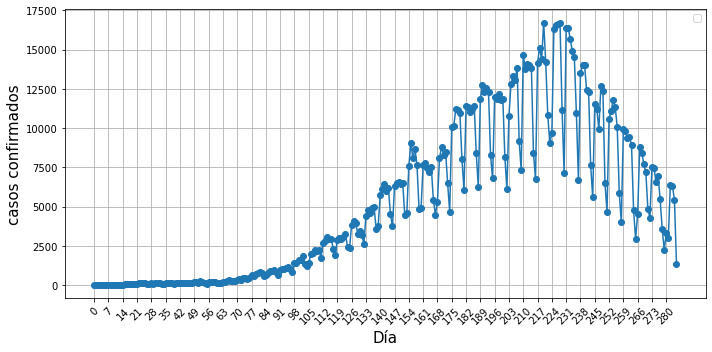

In [132]:
time_plot( np.int64(df['fecha_dias']), df['casos_nuevos'], ylabel='casos confirmados', filename='dataset_nuevo/casos_nuevos_vs_dias.png' )

No handles with labels found to put in legend.


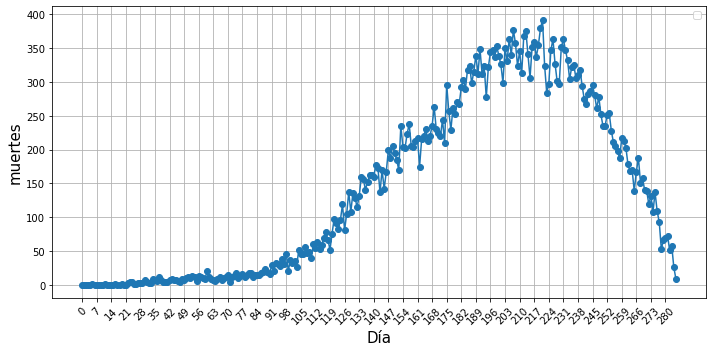

In [133]:
time_plot( np.int64(df['fecha_dias']), df['muertes_nuevos'], ylabel='muertes', filename='dataset_nuevo/muertes_nuevos_vs_dias.png' )

No handles with labels found to put in legend.


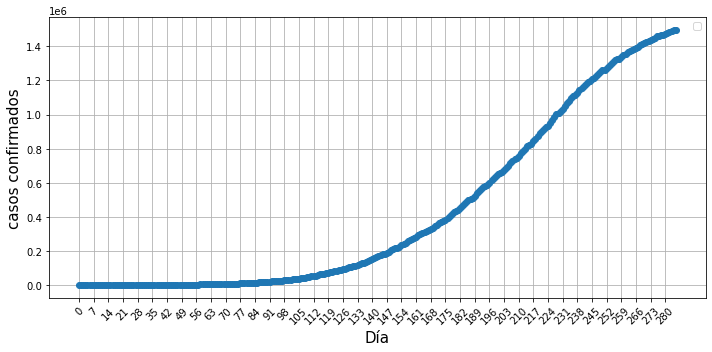

In [134]:
time_plot( np.int64(df['fecha_dias']), df['casos_totales'], ylabel='casos confirmados', filename='dataset_nuevo/casos_totales_vs_dias.png' )

No handles with labels found to put in legend.


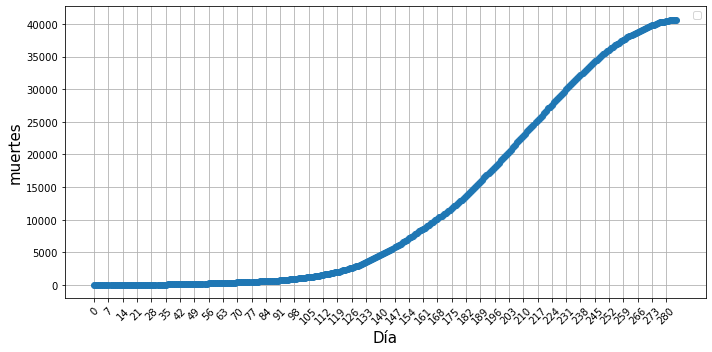

In [135]:
time_plot( np.int64(df['fecha_dias']), df['muertes_totales'], ylabel='muertes', filename='dataset_nuevo/muertes_totales_vs_dias.png' )

No handles with labels found to put in legend.


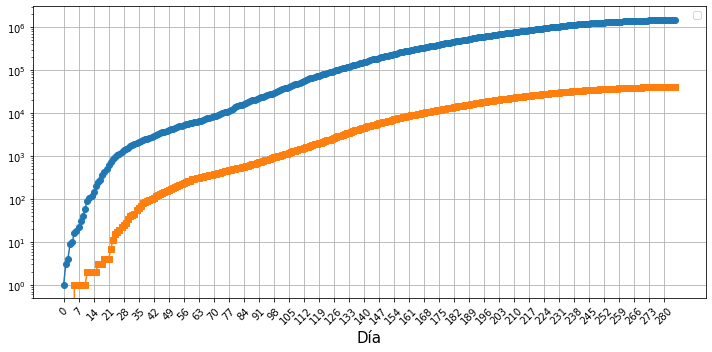

In [136]:
time_plot( np.int64(df['fecha_dias']), df['casos_totales'], y2=df['muertes_totales'] , scale='log', filename='dataset_nuevo/casos_muertes_totales_vs_dias.png' )

In [137]:
df[['fecha', 'casos_totales', 'muertes_totales']]

,fecha,casos_totales,muertes_totales
0,2020-03-02,1,0
1,2020-03-03,3,0
2,2020-03-04,4,0
3,2020-03-05,9,0
4,2020-03-06,10,0
...,...,...,...
281,2020-12-08,1475114,40524
282,2020-12-09,1481483,40575
283,2020-12-10,1487817,40633
284,2020-12-11,1493236,40659


/home/matias/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


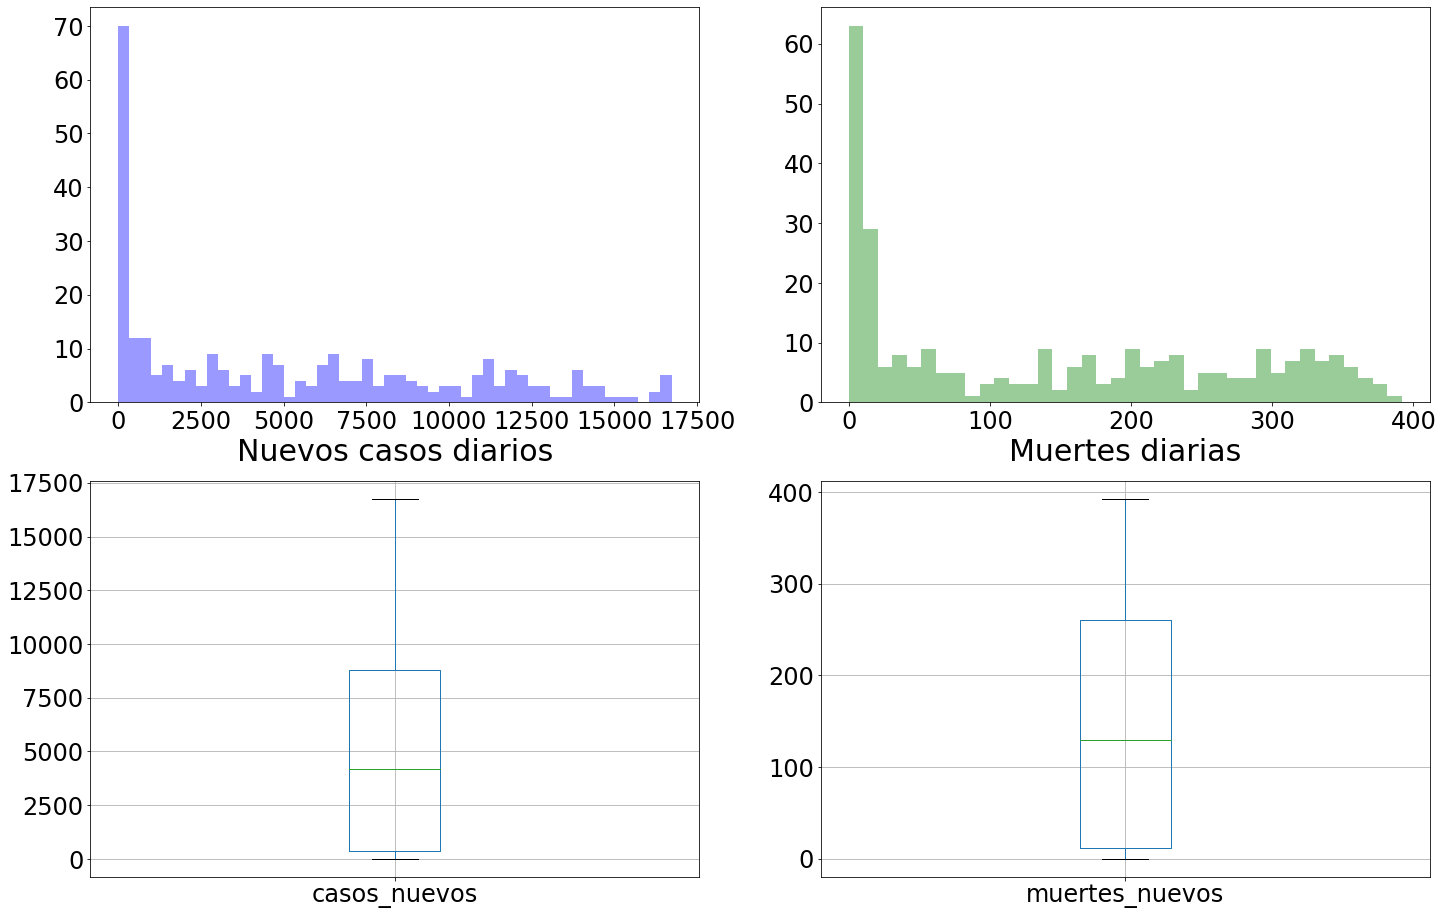

In [139]:
fig, axs = plt.subplots(2,2, figsize=(24, 16))  # para plotear un gráfico al lado del otro

sns.distplot(df['casos_nuevos'],kde=False, bins=50, label='Nuevos casos diarios', color='blue', ax=axs[0,0])
sns.distplot(df['muertes_nuevos'],kde=False, bins=38, label='Muertes diarias', color='green', ax=axs[0,1])

for ax in axs[0]:
    ax.title.set_fontsize(30)
    ax.tick_params(axis="x", labelsize=24)
    ax.tick_params(axis="y", labelsize=24)
axs[0,0].set_xlabel('Nuevos casos diarios', fontsize = 30)
axs[0,1].set_xlabel('Muertes diarias', fontsize = 30)

df.boxplot(column='casos_nuevos', ax=axs[1,0])
df.boxplot(column='muertes_nuevos', ax=axs[1,1])

for ax in axs[1]:
    ax.title.set_fontsize(20)
    ax.tick_params(axis="x", labelsize=24)
    ax.tick_params(axis="y", labelsize=24)

/home/matias/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Muertes diarias')

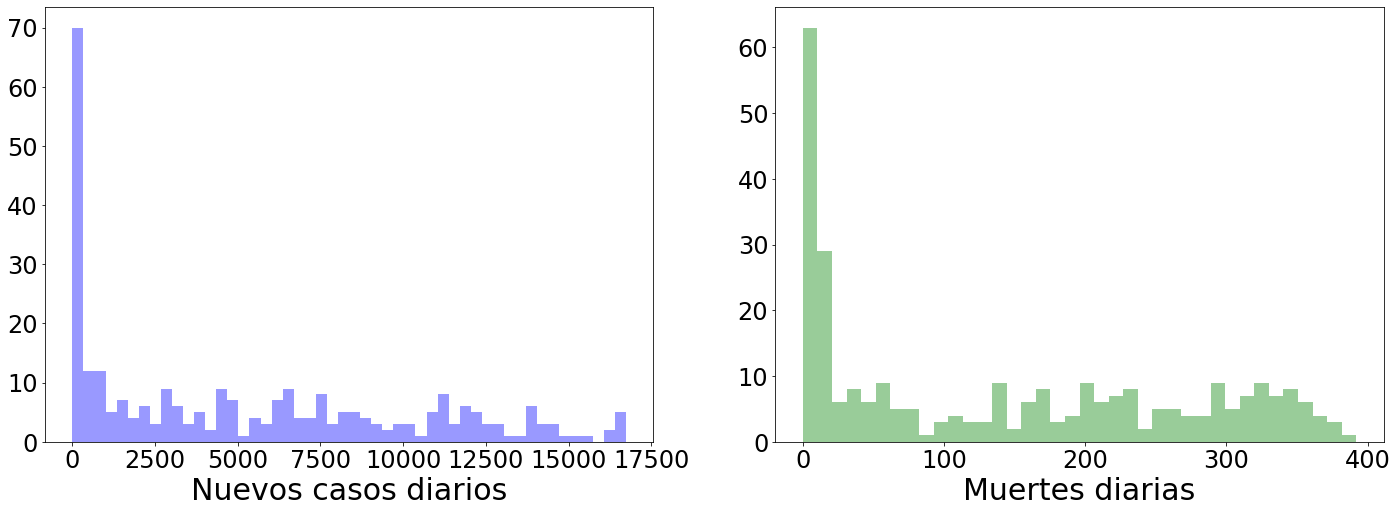

In [140]:
fig, axs = plt.subplots(1,2, figsize=(24, 8))  # para plotear un gráfico al lado del otro

sns.distplot(df['casos_nuevos'],kde=False, bins=50, label='Nuevos casos diarios', color='blue', ax=axs[0])
sns.distplot(df['muertes_nuevos'],kde=False, bins=38, label='Muertes diarias', color='green', ax=axs[1])

for ax in axs:
    ax.title.set_fontsize(30)
    ax.tick_params(axis="x", labelsize=24)
    ax.tick_params(axis="y", labelsize=24)
axs[0].set_xlabel('Nuevos casos diarios', fontsize = 30)
axs[1].set_xlabel('Muertes diarias', fontsize = 30)

In [144]:
muertes_mujeres = fallecidos[ (fallecidos.sexo_f) & (fallecidos.edad<110.)]
muertes_varones = fallecidos[ (fallecidos.sexo_m) & (fallecidos.edad<110.)]

Text(0.5, 0, 'Genero')

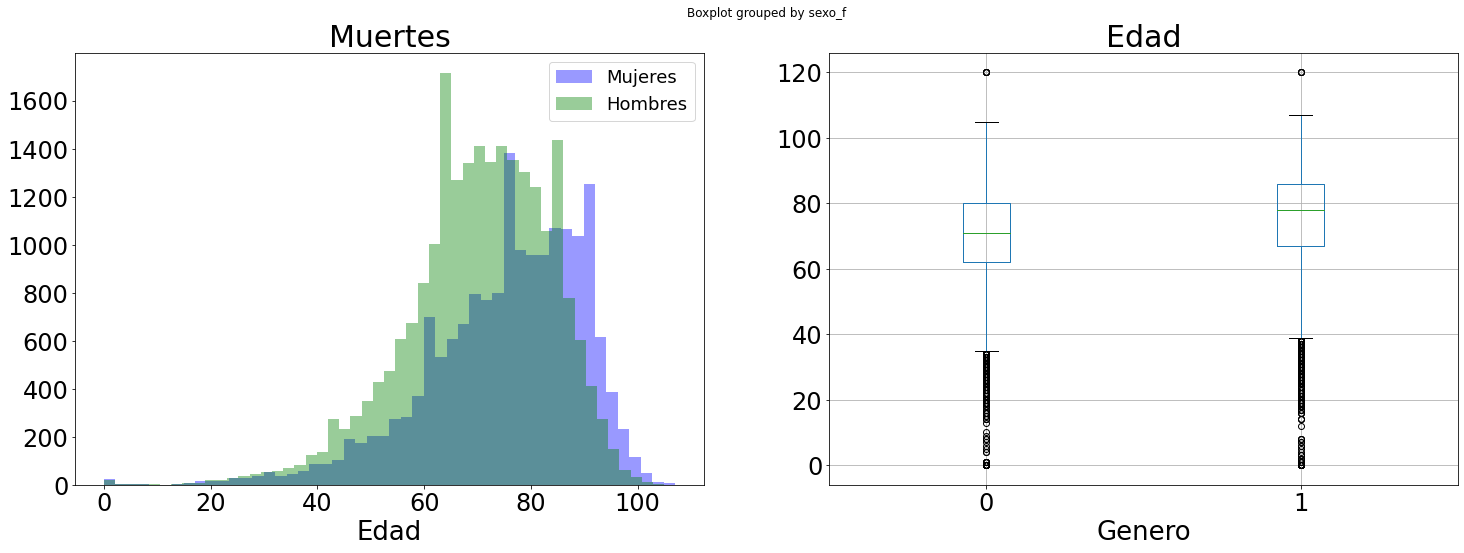

In [146]:
fig, axs = plt.subplots(ncols=2, figsize=(24, 8))  # para plotear un gráfico al lado del otro


sns.distplot(muertes_mujeres['edad'],kde=False, bins=50, label='Mujeres', color='blue', ax=axs[0])
sns.distplot(muertes_varones['edad'],kde=False, bins=50, label='Hombres', color='green', ax=axs[0])

axs[0].tick_params(axis="x", labelsize=24)
axs[0].tick_params(axis="y", labelsize=24)
axs[0].set_xlabel('Edad', fontsize = 26)
axs[0].legend(fontsize=18)
axs[0].set_title('Muertes',fontsize=30)

fallecidos.boxplot(column='edad',by='sexo_f', rot=0, ax=axs[1], fontsize=24)

axs[1].set_title('Edad',fontsize=30)
axs[1].set_xlabel('Genero', fontsize = 26)

In [147]:
def to_categorical(column, bin_size=20, min_cut=20, max_cut=100):
    if min_cut is None:
        min_cut = int(round(column.min())) - 1
    value_max = int(np.ceil(column.max()))
    max_cut = min(max_cut, value_max)
    intervals = [(x, x + bin_size) for x in range(min_cut, max_cut, bin_size)]
    if max_cut != value_max:
        intervals.append((max_cut, value_max))
    print(intervals)
    return pd.cut(column, pd.IntervalIndex.from_tuples(intervals))

[(20, 40), (40, 60), (60, 80), (80, 100)]


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Edades', ylabel='residencia_provincia_nombre'>

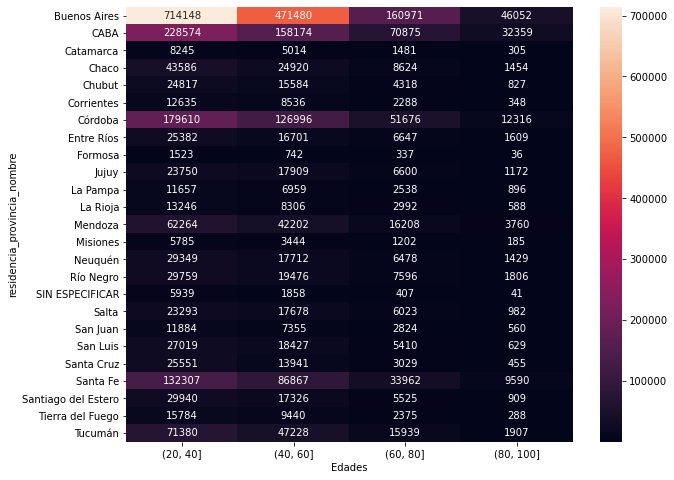

In [148]:
df_edades = dataset[ (~dataset.edad.isnull()) & (dataset.edad < 100. )]
df_edades['Edades'] = to_categorical(df_edades.edad)

plt.figure(figsize=(10, 8))
exp = pd.crosstab(df_edades.residencia_provincia_nombre, df_edades.Edades)
sns.heatmap(exp, annot=True, fmt='g')

[(20, 40), (40, 60), (60, 80), (80, 100)]


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Edades', ylabel='residencia_provincia_nombre'>

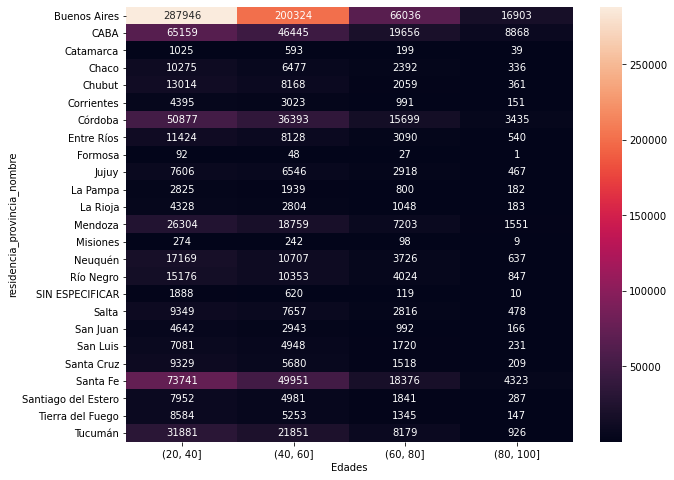

In [149]:
df_edades = confirmados[ (~confirmados.edad.isnull()) & (confirmados.edad < 100. )]
df_edades['Edades'] = to_categorical(df_edades.edad)

plt.figure(figsize=(10, 8))
exp = pd.crosstab(df_edades.residencia_provincia_nombre, df_edades.Edades)
sns.heatmap(exp, annot=True, fmt='g')

[(20, 40), (40, 60), (60, 80), (80, 100)]


/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Edades', ylabel='residencia_provincia_nombre'>

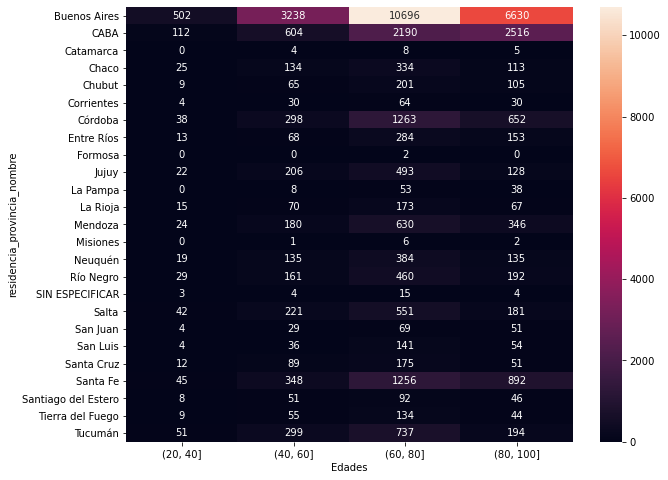

In [150]:
df_edades = fallecidos[ (~fallecidos.edad.isnull()) & (fallecidos.edad < 100. )]
df_edades['Edades'] = to_categorical(df_edades.edad)

plt.figure(figsize=(10, 8))
exp = pd.crosstab(df_edades.residencia_provincia_nombre, df_edades.Edades)
sns.heatmap(exp, annot=True, fmt='g')